<a href="https://colab.research.google.com/github/Kevin-Cutler/Final-Project/blob/Kevin_Test_Branch/Class_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [432]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Initial imports.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced





In [433]:
# Read in Movies CSV
movies_df = pd.read_csv("/content/movies.csv")
movies_df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [434]:
# Check for duplicates in the dataset movies_df
print(f"Duplicate entries: {movies_df['name'].duplicated().sum()}")

Duplicate entries: 156


In [435]:
# Read in Top Movies CSV
top_4000_movies_df = pd.read_csv("/content/top_4000_movies_data.csv", parse_dates=['Release Date'], dayfirst=True)
top_4000_movies_df.head(20)

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523
5,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,309420425,960996492
6,2017-11-13,Justice League,300000000,229024295,655945209
7,2015-06-10,Spectre,300000000,200074175,879500760
8,2019-12-18,Star Wars: The Rise of Skywalker,275000000,515202542,1072848487
9,2018-05-23,Solo: A Star Wars Story,275000000,213767512,393151347


In [436]:
# Check for duplicates in the dataset top_4000_movies_df
print(f"Duplicate entries: {top_4000_movies_df['Movie Title'].duplicated().sum()}")

Duplicate entries: 48


In [386]:
top_4000_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release Date       3979 non-null   datetime64[ns]
 1   Movie Title        4000 non-null   object        
 2   Production Budget  4000 non-null   int64         
 3   Domestic Gross     4000 non-null   int64         
 4   Worldwide Gross    4000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 156.4+ KB


In [388]:
top_4000_movies_df.nunique()

Release Date         2267
Movie Title          3952
Production Budget     280
Domestic Gross       3828
Worldwide Gross      3939
dtype: int64

In [387]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [389]:
movies_df.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

In [390]:
# See what data you have available
movies_df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [391]:
# See what data you have available
top_4000_movies_df.columns

Index(['Release Date', 'Movie Title', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross'],
      dtype='object')

In [392]:
# Combine the data into a single dataset.
#Merged_Movie_df = top_4000_movies_df.merge( movies_df, left_on='Movie Title', right_on='name')
Merged_Movie_df = top_4000_movies_df.merge( movies_df, how='inner', left_on='Movie Title', right_on='name')

Merged_Movie_df.head(100)

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,2017-11-13,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,2015-06-10,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",6.8,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-05-22,Aladdin,182000000,355559216,1046649706,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
96,1992-11-11,Aladdin,28000000,217350219,504050219,Aladdin,G,Animation,1992,"November 25, 1992 (United States)",8.0,382000.0,Ron Clements,Ron Clements,Scott Weinger,United States,28000000.0,5.040502e+08,Walt Disney Pictures,90.0
97,1992-11-11,Aladdin,28000000,217350219,504050219,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
98,2017-10-25,Thor: Ragnarok,180000000,315058289,850482778,Thor: Ragnarok,PG-13,Action,2017,"November 3, 2017 (United States)",7.9,628000.0,Taika Waititi,Eric Pearson,Chris Hemsworth,United States,180000000.0,8.539839e+08,Walt Disney Pictures,130.0


In [393]:
Merged_Movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3121 entries, 0 to 3120
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release Date       3121 non-null   datetime64[ns]
 1   Movie Title        3121 non-null   object        
 2   Production Budget  3121 non-null   int64         
 3   Domestic Gross     3121 non-null   int64         
 4   Worldwide Gross    3121 non-null   int64         
 5   name               3121 non-null   object        
 6   rating             3117 non-null   object        
 7   genre              3121 non-null   object        
 8   year               3121 non-null   int64         
 9   released           3120 non-null   object        
 10  score              3121 non-null   float64       
 11  votes              3121 non-null   float64       
 12  director           3121 non-null   object        
 13  writer             3121 non-null   object        
 14  star    

In [394]:
# Check for duplicates in the dataset Merged_Movie_df
print(f"Duplicate entries: {Merged_Movie_df.duplicated().sum()}")

Duplicate entries: 0


In [396]:
Merged_Movie_df.nunique()

Release Date         1862
Movie Title          2923
Production Budget     244
Domestic Gross       2959
Worldwide Gross      2961
name                 2923
rating                  8
genre                  14
year                   41
released             1732
score                  69
votes                 633
director             1287
writer               1933
star                 1031
country                36
budget                241
gross                3033
company               735
runtime               124
dtype: int64

In [397]:
Merged_Movie_df.columns

Index(['Release Date', 'Movie Title', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'name', 'rating', 'genre', 'year', 'released',
       'score', 'votes', 'director', 'writer', 'star', 'country', 'budget',
       'gross', 'company', 'runtime'],
      dtype='object')

In [398]:
Merged_Movie_df.rename(columns={'Release Date':'Release_Date', 'Movie Title':'Movie_Title', 'Production Budget':'Production_Budget', 'Domestic Gross':'Domestic_Gross',
       'Worldwide Gross':'Worldwide_Gross'},inplace=True)

In [399]:
Merged_Movie_df.head()

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,2017-11-13,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,2015-06-10,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",6.8,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [400]:
# Check IMDB score column to categorize the score ratings as Favorable vs Unfavorable
Merged_Movie_df.score.unique()


array([8.4, 7.3, 6.1, 6.8, 6.9, 6.6, 6.4, 8.5, 7.7, 6.2, 7.8, 7.6, 7.4,
       6. , 6.5, 3.8, 8. , 7. , 5.8, 5.2, 5.6, 5.3, 7.2, 8.2, 7.1, 6.3,
       7.9, 5.5, 5.4, 6.7, 9. , 7.5, 8.1, 5.9, 4.9, 8.6, 8.8, 5.7, 4. ,
       5.1, 5. , 4.8, 4.6, 3.9, 4.2, 8.3, 3.4, 2.2, 4.5, 8.9, 8.7, 4.3,
       3.3, 4.7, 3.1, 3.7, 4.4, 2.5, 2.7, 4.1, 2.8, 3.5, 9.3, 2.9, 2.4,
       1.9, 3.2, 3.6, 2.1])

In [401]:
# Transform the score into over 5 or under 5 categories

def change_score_to_Category(IMDB):
  if IMDB >= 6 :
    return "Favorable"
  else: 
    return "Unfavorable"

Merged_Movie_df['score'] = Merged_Movie_df['score'].apply(change_score_to_Category)
Merged_Movie_df.head()
  

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",Favorable,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",Favorable,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",Favorable,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,2017-11-13,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",Favorable,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,2015-06-10,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",Favorable,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [ ]:
# Create Custom Encoding for IMDB Score


# score_to_Category = {
#  "Favorable": 1,
#  "Unfavorable": 0,

#}

In [ ]:
# Create Custom Encoding for IMDB Score
#Merged_Movie_df["score_to_Category"] = Merged_Movie_df["score"].apply(lambda x: score_to_Category[x])

In [402]:
#from google.colab import files
#Merged_Movie_df.to_csv('Merged_Movie_New.csv') 
#files.download('Merged_Movie_New.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [403]:
Merged_Movie_df.nunique()

Release_Date         1862
Movie_Title          2923
Production_Budget     244
Domestic_Gross       2959
Worldwide_Gross      2961
name                 2923
rating                  8
genre                  14
year                   41
released             1732
score                   2
votes                 633
director             1287
writer               1933
star                 1031
country                36
budget                241
gross                3033
company               735
runtime               124
dtype: int64

In [404]:
Merged_Movie_df.dtypes

Release_Date         datetime64[ns]
Movie_Title                  object
Production_Budget             int64
Domestic_Gross                int64
Worldwide_Gross               int64
name                         object
rating                       object
genre                        object
year                          int64
released                     object
score                        object
votes                       float64
director                     object
writer                       object
star                         object
country                      object
budget                      float64
gross                       float64
company                      object
runtime                     float64
dtype: object

In [405]:
# Check for null values
for column in Merged_Movie_df.columns:
    print(f"Column {column} has {Merged_Movie_df[column].isnull().sum()} null values")

Column Release_Date has 0 null values
Column Movie_Title has 0 null values
Column Production_Budget has 0 null values
Column Domestic_Gross has 0 null values
Column Worldwide_Gross has 0 null values
Column name has 0 null values
Column rating has 4 null values
Column genre has 0 null values
Column year has 0 null values
Column released has 1 null values
Column score has 0 null values
Column votes has 0 null values
Column director has 0 null values
Column writer has 0 null values
Column star has 0 null values
Column country has 1 null values
Column budget has 117 null values
Column gross has 7 null values
Column company has 1 null values
Column runtime has 2 null values


In [406]:
Merged_Movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3121 entries, 0 to 3120
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       3121 non-null   datetime64[ns]
 1   Movie_Title        3121 non-null   object        
 2   Production_Budget  3121 non-null   int64         
 3   Domestic_Gross     3121 non-null   int64         
 4   Worldwide_Gross    3121 non-null   int64         
 5   name               3121 non-null   object        
 6   rating             3117 non-null   object        
 7   genre              3121 non-null   object        
 8   year               3121 non-null   int64         
 9   released           3120 non-null   object        
 10  score              3121 non-null   object        
 11  votes              3121 non-null   float64       
 12  director           3121 non-null   object        
 13  writer             3121 non-null   object        
 14  star    

In [407]:
# Drop Null Rows and useless columns

Merged_Movie_df = Merged_Movie_df.dropna()
# Remove two columns name is 'name' and 'released' and Release_Date and 'country'
Merged_Movie_df = Merged_Movie_df.drop(['name', 'released', 'Release_Date', 'country' ], axis = 1)


In [413]:
Merged_Movie_df = Merged_Movie_df.drop_duplicates(subset= 'Movie_Title', keep= 'first', inplace=False)

In [414]:
Merged_Movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 0 to 3120
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        2847 non-null   object 
 1   Production_Budget  2847 non-null   int64  
 2   Domestic_Gross     2847 non-null   int64  
 3   Worldwide_Gross    2847 non-null   int64  
 4   rating             2847 non-null   object 
 5   genre              2847 non-null   object 
 6   year               2847 non-null   int64  
 7   score              2847 non-null   object 
 8   votes              2847 non-null   float64
 9   director           2847 non-null   object 
 10  writer             2847 non-null   object 
 11  star               2847 non-null   object 
 12  budget             2847 non-null   float64
 13  gross              2847 non-null   float64
 14  company            2847 non-null   object 
 15  runtime            2847 non-null   float64
dtypes: float64(4), int64(4),

In [ ]:
# Check for null values
for column in Merged_Movie_df.columns:
    print(f"Column {column} has {Merged_Movie_df[column].isnull().sum()} null values")

Column Movie_Title has 0 null values
Column Production_Budget has 0 null values
Column Domestic_Gross has 0 null values
Column Worldwide_Gross has 0 null values
Column rating has 0 null values
Column genre has 0 null values
Column year has 0 null values
Column score has 0 null values
Column votes has 0 null values
Column director has 0 null values
Column writer has 0 null values
Column star has 0 null values
Column budget has 0 null values
Column gross has 0 null values
Column company has 0 null values
Column runtime has 0 null values


In [ ]:
Merged_Movie_df.columns

Index(['Movie_Title', 'Production_Budget', 'Domestic_Gross', 'Worldwide_Gross',
       'rating', 'genre', 'year', 'score', 'votes', 'director', 'writer',
       'star', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

In [ ]:
# Transform Production_Budget column to scale for the model
Merged_Movie_df['Production_Budget'] =  Merged_Movie_df['Production_Budget']/1000000
# Transform Domestic_Gross column to scale for the model
Merged_Movie_df['Domestic_Gross'] = Merged_Movie_df['Domestic_Gross']/1000000
# Transform Worldwide_Gross column to scale for the model
Merged_Movie_df['Worldwide_Gross'] = Merged_Movie_df['Worldwide_Gross']/1000000
# Transform budget column to scale for the model
Merged_Movie_df['budget'] = Merged_Movie_df['budget']/1000000
# Transform gross column to scale for the model
Merged_Movie_df['gross'] = Merged_Movie_df['gross']/1000000
# Transform votes column to scale for the model
Merged_Movie_df['votes'] = Merged_Movie_df['votes']/10000


Merged_Movie_df.head()


,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,rating,genre,year,score,votes,director,writer,star,budget,gross,company,runtime
0,Avengers: Endgame,400.0,858.373000,2797.800564,PG-13,Action,2019,Favorable,90.3,Anthony Russo,Christopher Markus,Robert Downey Jr.,356.0,2797.501328,Marvel Studios,181.0
1,Avengers: Age of Ultron,365.0,459.005868,1395.316979,PG-13,Action,2015,Favorable,77.7,Joss Whedon,Joss Whedon,Robert Downey Jr.,250.0,1402.809540,Marvel Studios,141.0
2,Avengers: Infinity War,300.0,678.815482,2044.540523,PG-13,Action,2018,Favorable,89.7,Anthony Russo,Christopher Markus,Robert Downey Jr.,321.0,2048.359754,Marvel Studios,149.0
3,Justice League,300.0,229.024295,655.945209,PG-13,Action,2017,Favorable,41.8,Zack Snyder,Jerry Siegel,Ben Affleck,300.0,657.926987,Warner Bros.,120.0
4,Spectre,300.0,200.074175,879.500760,PG-13,Action,2015,Favorable,39.3,Sam Mendes,John Logan,Daniel Craig,245.0,880.681519,B24,148.0


In [ ]:
# Select all of the columns with a object dtype
Merged_Movie_df.select_dtypes(include = 'object') 

,Movie_Title,rating,genre,score,director,writer,star,company
0,Avengers: Endgame,PG-13,Action,Favorable,Anthony Russo,Christopher Markus,Robert Downey Jr.,Marvel Studios
1,Avengers: Age of Ultron,PG-13,Action,Favorable,Joss Whedon,Joss Whedon,Robert Downey Jr.,Marvel Studios
2,Avengers: Infinity War,PG-13,Action,Favorable,Anthony Russo,Christopher Markus,Robert Downey Jr.,Marvel Studios
3,Justice League,PG-13,Action,Favorable,Zack Snyder,Jerry Siegel,Ben Affleck,Warner Bros.
4,Spectre,PG-13,Action,Favorable,Sam Mendes,John Logan,Daniel Craig,B24
...,...,...,...,...,...,...,...,...
3115,The Lost City,R,Drama,Favorable,Andy Garcia,Guillermo Cabrera Infante,Andy Garcia,Crescent Drive Pictures
3116,Next Friday,R,Comedy,Favorable,Steve Carr,Ice Cube,Ice Cube,New Line Cinema
3117,Poltergeist III,PG,Horror,Unfavorable,Gary Sherman,Gary Sherman,Heather O'Rourke,Metro-Goldwyn-Mayer (MGM)
3119,The Runaways,R,Biography,Favorable,Floria Sigismondi,Floria Sigismondi,Kristen Stewart,River Road Entertainment


In [ ]:
# Hot encoding categorical columns
# Merged_Movie_encoded = pd.get_dummies(Merged_Movie_df, columns=[ "Movie_Title","rating","genre","director","writer","star","country","company"])
# Merged_Movie_encoded.head()

,Production_Budget,Domestic_Gross,Worldwide_Gross,year,votes,budget,gross,runtime,score_to_Category,Movie_Title_10 Cloverfield Lane,Movie_Title_10 Things I Hate About You,Movie_Title_102 Dalmatians,Movie_Title_12 Monkeys,Movie_Title_12 Rounds,Movie_Title_12 Strong,Movie_Title_12 Years a Slave,Movie_Title_127 Hours,Movie_Title_1408,Movie_Title_15 Minutes,Movie_Title_16 Blocks,Movie_Title_17 Again,Movie_Title_1917,Movie_Title_2 Fast 2 Furious,Movie_Title_2 Guns,Movie_Title_2012,Movie_Title_2046,Movie_Title_21,Movie_Title_21 Grams,Movie_Title_21 Jump Street,Movie_Title_22 Jump Street,Movie_Title_27 Dresses,Movie_Title_28 Days,Movie_Title_28 Weeks Later,Movie_Title_3 Days to Kill,Movie_Title_3 Ninjas Kick Back,Movie_Title_30 Days of Night,Movie_Title_30 Minutes or Less,Movie_Title_300,Movie_Title_3000 Miles to Graceland,Movie_Title_300: Rise of an Empire,...,company_UK Film Council,company_USA Films,company_United Artists,company_United Artists Film Corporation,company_United Film Distribution Company (UFDC),company_Universal Pictures,company_Upside Down Films,company_Vanguard Films and Animation,company_Vegahom Europe,company_Verdi Productions,company_View Askew Productions,company_Village Roadshow Pictures,company_Visiona Romantica,company_Voltage Pictures,company_Votiv Films,company_WIP,company_Walden Media,company_Walt Disney Animation Studios,company_Walt Disney Pictures,company_Walt Disney Productions,company_Warner Animation Group,company_Warner Bros.,company_Warner Bros. Family Entertainment,company_Warner Independent Pictures (WIP),company_Waverly Films,company_Wayfare Entertainment,company_Weintraub Entertainment Group,company_White Eagle,company_Why Not Productions,company_Wildgaze Films,company_Winkler Films,company_Working Title Films,company_Worldview Entertainment,company_X-Filme Creative Pool,company_Yari Film Group Releasing,company_Yellow Bird,company_Young Hannibal Productions,company_Zentropa Entertainments,company_Zoetrope Studios,company_double A Films
0,400.0,858.373000,2797.800564,2019,90.3,356.0,2797.501328,181.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,365.0,459.005868,1395.316979,2015,77.7,250.0,1402.809540,141.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,300.0,678.815482,2044.540523,2018,89.7,321.0,2048.359754,149.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,300.0,229.024295,655.945209,2017,41.8,300.0,657.926987,120.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,300.0,200.074175,879.500760,2015,39.3,245.0,880.681519,148.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X = Merged_Movie_encoded.copy()
# X.head()

,Production_Budget,Domestic_Gross,Worldwide_Gross,year,votes,budget,gross,runtime,score_to_Category,Movie_Title_10 Cloverfield Lane,Movie_Title_10 Things I Hate About You,Movie_Title_102 Dalmatians,Movie_Title_12 Monkeys,Movie_Title_12 Rounds,Movie_Title_12 Strong,Movie_Title_12 Years a Slave,Movie_Title_127 Hours,Movie_Title_1408,Movie_Title_15 Minutes,Movie_Title_16 Blocks,Movie_Title_17 Again,Movie_Title_1917,Movie_Title_2 Fast 2 Furious,Movie_Title_2 Guns,Movie_Title_2012,Movie_Title_2046,Movie_Title_21,Movie_Title_21 Grams,Movie_Title_21 Jump Street,Movie_Title_22 Jump Street,Movie_Title_27 Dresses,Movie_Title_28 Days,Movie_Title_28 Weeks Later,Movie_Title_3 Days to Kill,Movie_Title_3 Ninjas Kick Back,Movie_Title_30 Days of Night,Movie_Title_30 Minutes or Less,Movie_Title_300,Movie_Title_3000 Miles to Graceland,Movie_Title_300: Rise of an Empire,...,company_UK Film Council,company_USA Films,company_United Artists,company_United Artists Film Corporation,company_United Film Distribution Company (UFDC),company_Universal Pictures,company_Upside Down Films,company_Vanguard Films and Animation,company_Vegahom Europe,company_Verdi Productions,company_View Askew Productions,company_Village Roadshow Pictures,company_Visiona Romantica,company_Voltage Pictures,company_Votiv Films,company_WIP,company_Walden Media,company_Walt Disney Animation Studios,company_Walt Disney Pictures,company_Walt Disney Productions,company_Warner Animation Group,company_Warner Bros.,company_Warner Bros. Family Entertainment,company_Warner Independent Pictures (WIP),company_Waverly Films,company_Wayfare Entertainment,company_Weintraub Entertainment Group,company_White Eagle,company_Why Not Productions,company_Wildgaze Films,company_Winkler Films,company_Working Title Films,company_Worldview Entertainment,company_X-Filme Creative Pool,company_Yari Film Group Releasing,company_Yellow Bird,company_Young Hannibal Productions,company_Zentropa Entertainments,company_Zoetrope Studios,company_double A Films
0,400.0,858.373000,2797.800564,2019,90.3,356.0,2797.501328,181.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,365.0,459.005868,1395.316979,2015,77.7,250.0,1402.809540,141.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,300.0,678.815482,2044.540523,2018,89.7,321.0,2048.359754,149.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,300.0,229.024295,655.945209,2017,41.8,300.0,657.926987,120.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,300.0,200.074175,879.500760,2015,39.3,245.0,880.681519,148.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Movie_Title', 'rating', 'genre', 'score','director','writer','star','company']

In [ ]:
df2 = Merged_Movie_df.copy()

In [ ]:
df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)

In [ ]:
# Hot incode method using label encoder

# le = LabelEncoder()
#df2 = Merged_Movie_df.copy()
#df2["Movie_Title"] = le.fit_transform(df2["Movie_Title"]) 
#df2["rating"] = le.fit_transform(df2["rating"]) 
#df2["genre"] = le.fit_transform(df2["genre"]) 
#df2["score"] = le.fit_transform(df2["score"]) 
#df2["director"] = le.fit_transform(df2["director"]) 
#df2["writer"] = le.fit_transform(df2["writer"]) 
#df2["star"] = le.fit_transform(df2["star"]) 
#df2["company"] = le.fit_transform(df2["company"]) 
#df2.head()

,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,rating,genre,year,score,votes,director,writer,star,budget,gross,company,runtime
0,213,400.0,858.373000,2797.800564,4,0,2019,0,90.3,67,277,790,356.0,2797.501328,455,181.0
1,212,365.0,459.005868,1395.316979,4,0,2015,0,77.7,638,956,790,250.0,1402.809540,455,141.0
2,214,300.0,678.815482,2044.540523,4,0,2018,0,89.7,67,277,790,321.0,2048.359754,455,149.0
3,1128,300.0,229.024295,655.945209,4,0,2017,0,41.8,1225,804,80,300.0,657.926987,658,120.0
4,1865,300.0,200.074175,879.500760,4,0,2015,0,39.3,1020,878,207,245.0,880.681519,86,148.0


In [ ]:
df2.head()

,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,rating,genre,year,score,votes,director,writer,star,budget,gross,company,runtime
0,213,400.0,858.373000,2797.800564,4,0,2019,0,90.3,67,277,790,356.0,2797.501328,455,181.0
1,212,365.0,459.005868,1395.316979,4,0,2015,0,77.7,638,956,790,250.0,1402.809540,455,141.0
2,214,300.0,678.815482,2044.540523,4,0,2018,0,89.7,67,277,790,321.0,2048.359754,455,149.0
3,1128,300.0,229.024295,655.945209,4,0,2017,0,41.8,1225,804,80,300.0,657.926987,658,120.0
4,1865,300.0,200.074175,879.500760,4,0,2015,0,39.3,1020,878,207,245.0,880.681519,86,148.0


In [ ]:
# Define features set

# X = X.drop("score_to_Category", axis=1)
# X.head()

,Production_Budget,Domestic_Gross,Worldwide_Gross,year,votes,budget,gross,runtime,Movie_Title_10 Cloverfield Lane,Movie_Title_10 Things I Hate About You,Movie_Title_102 Dalmatians,Movie_Title_12 Monkeys,Movie_Title_12 Rounds,Movie_Title_12 Strong,Movie_Title_12 Years a Slave,Movie_Title_127 Hours,Movie_Title_1408,Movie_Title_15 Minutes,Movie_Title_16 Blocks,Movie_Title_17 Again,Movie_Title_1917,Movie_Title_2 Fast 2 Furious,Movie_Title_2 Guns,Movie_Title_2012,Movie_Title_2046,Movie_Title_21,Movie_Title_21 Grams,Movie_Title_21 Jump Street,Movie_Title_22 Jump Street,Movie_Title_27 Dresses,Movie_Title_28 Days,Movie_Title_28 Weeks Later,Movie_Title_3 Days to Kill,Movie_Title_3 Ninjas Kick Back,Movie_Title_30 Days of Night,Movie_Title_30 Minutes or Less,Movie_Title_300,Movie_Title_3000 Miles to Graceland,Movie_Title_300: Rise of an Empire,Movie_Title_3:10 to Yuma,...,company_UK Film Council,company_USA Films,company_United Artists,company_United Artists Film Corporation,company_United Film Distribution Company (UFDC),company_Universal Pictures,company_Upside Down Films,company_Vanguard Films and Animation,company_Vegahom Europe,company_Verdi Productions,company_View Askew Productions,company_Village Roadshow Pictures,company_Visiona Romantica,company_Voltage Pictures,company_Votiv Films,company_WIP,company_Walden Media,company_Walt Disney Animation Studios,company_Walt Disney Pictures,company_Walt Disney Productions,company_Warner Animation Group,company_Warner Bros.,company_Warner Bros. Family Entertainment,company_Warner Independent Pictures (WIP),company_Waverly Films,company_Wayfare Entertainment,company_Weintraub Entertainment Group,company_White Eagle,company_Why Not Productions,company_Wildgaze Films,company_Winkler Films,company_Working Title Films,company_Worldview Entertainment,company_X-Filme Creative Pool,company_Yari Film Group Releasing,company_Yellow Bird,company_Young Hannibal Productions,company_Zentropa Entertainments,company_Zoetrope Studios,company_double A Films
0,400.0,858.373000,2797.800564,2019,90.3,356.0,2797.501328,181.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,365.0,459.005868,1395.316979,2015,77.7,250.0,1402.809540,141.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,300.0,678.815482,2044.540523,2018,89.7,321.0,2048.359754,149.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,300.0,229.024295,655.945209,2017,41.8,300.0,657.926987,120.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,300.0,200.074175,879.500760,2015,39.3,245.0,880.681519,148.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Using list comprehension we can drop not useful columns.
# X = Merged_Movie_df.copy()
# x_cols = [i for i in Merged_Movie_df.columns if i not in ("score", "released")]
# X = Merged_Movie_df[x_cols]
# X.head()

In [ ]:
X =df2
X = X.drop("score", axis=1)
X.head()

,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,rating,genre,year,votes,director,writer,star,budget,gross,company,runtime
0,213,400.0,858.373000,2797.800564,4,0,2019,90.3,67,277,790,356.0,2797.501328,455,181.0
1,212,365.0,459.005868,1395.316979,4,0,2015,77.7,638,956,790,250.0,1402.809540,455,141.0
2,214,300.0,678.815482,2044.540523,4,0,2018,89.7,67,277,790,321.0,2048.359754,455,149.0
3,1128,300.0,229.024295,655.945209,4,0,2017,41.8,1225,804,80,300.0,657.926987,658,120.0
4,1865,300.0,200.074175,879.500760,4,0,2015,39.3,1020,878,207,245.0,880.681519,86,148.0


In [ ]:
X.describe()

,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,rating,genre,year,votes,director,writer,star,budget,gross,company,runtime
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,1423.424758,51.270499,68.117233,152.909219,4.145145,2.864865,2005.053053,15.925705,635.097097,942.539206,493.021021,51.290416,153.226620,436.050050,111.229897
std,818.420472,46.767550,81.937466,223.921872,0.965676,2.602779,8.973864,21.333061,357.388873,534.332368,283.541639,46.237038,225.337504,191.682992,19.268937
min,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,1980.000000,0.024300,0.000000,0.000000,0.000000,0.550000,0.040397,0.000000,63.000000
25%,721.000000,20.000000,18.990542,30.443277,4.000000,0.000000,1999.000000,4.000000,327.000000,486.000000,249.000000,20.000000,29.882645,258.000000,98.000000
50%,1427.000000,35.000000,42.073277,74.966854,4.000000,3.000000,2006.000000,8.800000,650.000000,945.000000,487.000000,35.000000,75.837743,486.000000,108.000000
75%,2132.000000,65.000000,83.043761,180.047784,5.000000,4.000000,2012.000000,19.700000,959.000000,1411.000000,736.000000,65.000000,178.767383,629.000000,122.000000
max,2846.000000,400.000000,858.373000,2845.899541,6.000000,13.000000,2020.000000,240.000000,1226.000000,1854.000000,980.000000,356.000000,2847.246203,676.000000,271.000000


In [ ]:
# Define target vector
y = df2["score"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: score, dtype: int64

In [ ]:
# Check the balance of our target values
y.value_counts()

0    2163
1     834
Name: score, dtype: int64

In [ ]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


**Fit the Decision Tree Model**

In [ ]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Random forest

* Statistical algorithm that is used to cluster points of data in functional groups. 
* The random forest algorithm is a supervised learning model; it uses labeled data to “learn” how to classify unlabeled data.





**Random forest algorithms are beneficial because they:**

*   Are robust against overfitting as all of those weak learners are trained on different pieces of the data.
*  Can be used to rank the importance of input variables in a natural way.
*   Can handle thousands of input variables without variable deletion.
*   Are robust to outliers and nonlinear data.
*   Run efficiently on large datasets.






The n_estimators will allow us to set the number of trees that will be created by the algorithm. Generally, the higher number makes the predictions stronger and more stable, but can slow down the output because of the higher training time allocated. The best practice is to use between 64 and 128 random forests, though higher numbers are quite common despite the higher training time. 

In [ ]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

# **Fit the Decision Tree Model**

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# **Make Predictions Using the Testing Data**

In [ ]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

# **Evaluate the Model**

In [ ]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,520,32
Actual 1,95,103


# **Summary of Performancd: Confusion Matrix**



*   Out of 552 movies that obtained a "Favorable IMDB Score" (Actual 0), 520 were predicted to have a "Favorable IMDB Score" (Predicted 0), which is known as true positives.

*   Out of 552 movies that obtained a "Favorable IMDB Score" (Actual 0), 32 were predicted to have a "Unfavorable IMDB Score" (Predicted 1), which are considered false negatives.

*   Out of 198 movies that obtained a "Unfavorable IMDB Score" (Actual 1), 95 were predicted to have a "Favorable IMDB Score" (Predicted 0) and are considered false positives.

*   Out of 198 movies that obtained a "Unfavorable IMDB Score" (Actual 1), 103
 were predicted to be have a "Unfavorable IMDB Score" (Predicted 1) and are considered true negatives.





# **Below you can see that the model obtains a 83% Accuracy which is how often the classifier is correct!**

In [ ]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.8306666666666667

# The accuracy of our model is 0.831, which can also be calculated as follows:
**(True Positives (TP) + True Negatives (TN)) / Total = (520 + 103)/750 = 0.831**

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,520,32
Actual 1,95,103


Accuracy Score : 0.8306666666666667
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       552
           1       0.76      0.52      0.62       198

    accuracy                           0.83       750
   macro avg       0.80      0.73      0.75       750
weighted avg       0.82      0.83      0.82       750



Precision: Precision is the measure of how reliable a positive classification is. From our results, the precision for the good IMDB movie scores can be determined by the ratio TP/(TP + FP), which is 520/(520 + 95) = 0.85. The precision for the bad loan applications can be determined as follows: 103/(103 + 32) = 0.763. A low precision is indicative of a large number of false positives—of the 135 movie IMDB scores we predicted to obtain bad scores, 32 were actually recieved good IMDB movie scores.

Recall: Recall is the ability of the classifier to find all the positive samples. It can be determined by the ratio: TP/(TP + FN), or 520/(520 + 32) = 0.942 for the good loans and 103/(103 + 95) = 0.520 for the bad IMDB movie scores. A low recall is indicative of a large number of false negatives.

F1 score: F1 score is a weighted average of the true positive rate (recall) and precision, where the best score is 1.0 and the worst is 0.0.

Support: Support is the number of actual occurrences of the class in the specified dataset. For our results, there are 552 actual occurrences for the good IMDB movie scores and 198 actual occurrences for bad IMDB movie scores.

In [ ]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.05637304, 0.05129851, 0.06763163, 0.06217728, 0.01882924,
       0.03794966, 0.05119011, 0.19004147, 0.0535974 , 0.04925566,
       0.05233783, 0.05051668, 0.06643716, 0.04732257, 0.14504177])

In [ ]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.19004146531878238, 'votes'),
 (0.14504176929751458, 'runtime'),
 (0.067631634771992, 'Domestic_Gross'),
 (0.06643715845396098, 'gross'),
 (0.062177281525161505, 'Worldwide_Gross'),
 (0.05637303709167937, 'Movie_Title'),
 (0.05359740012949985, 'director'),
 (0.05233783066846515, 'star'),
 (0.05129850853827459, 'Production_Budget'),
 (0.05119010737753863, 'year'),
 (0.05051667655747315, 'budget'),
 (0.0492556607724103, 'writer'),
 (0.04732256840187235, 'company'),
 (0.037949658321521425, 'genre'),
 (0.018829242773853696, 'rating')]

In [ ]:
X.columns

Index(['Movie_Title', 'Production_Budget', 'Domestic_Gross', 'Worldwide_Gross',
       'rating', 'genre', 'year', 'votes', 'director', 'writer', 'star',
       'budget', 'gross', 'company', 'runtime'],
      dtype='object')

# **Display Feature Importance using a Bar Graph Below**

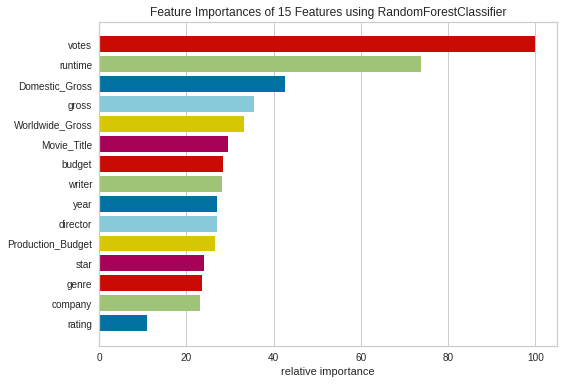

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances


model = RandomForestClassifier(n_estimators=15)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

# **Ensemble Learners**

# Balanced Random Forest Classifier

In [ ]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
BlRFC = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
BlRFC.fit(X_train, y_train)  
y_pred = BlRFC.predict(X_test)

In [ ]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.8114569609134827

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['Actual favorable IMDB Score', 'Actual Unfavorable IMDB Score'], columns=['Predicted favorable IMDB Score', 'Predicted Unfavorable IMDB Score'])
cm_df

,Predicted favorable IMDB Score,Predicted Unfavorable IMDB Score
Actual favorable IMDB Score,447,105
Actual Unfavorable IMDB Score,37,161


In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.81      0.81      0.86      0.81      0.66       552
          1       0.61      0.81      0.81      0.69      0.81      0.66       198

avg / total       0.84      0.81      0.81      0.82      0.81      0.66       750



In [ ]:
# List the features sorted in descending order by feature importance
sorted(zip(BlRFC.feature_importances_, X.columns), reverse=True)

[(0.19957491290355261, 'votes'),
 (0.14647322943469418, 'runtime'),
 (0.06867127708631279, 'Worldwide_Gross'),
 (0.06696901683090392, 'Domestic_Gross'),
 (0.06654424784291614, 'gross'),
 (0.055683931193920115, 'Movie_Title'),
 (0.05394083280389622, 'star'),
 (0.0518409197517334, 'Production_Budget'),
 (0.05103861727858889, 'budget'),
 (0.04864216050417413, 'writer'),
 (0.04853631740994779, 'year'),
 (0.04688596145965551, 'director'),
 (0.04446878455020804, 'company'),
 (0.03328656925276334, 'genre'),
 (0.017443221696732857, 'rating')]

# **Easy Ensemble AdaBoost Classifier**

In [ ]:
!pip install scikit-learn==1.0 -U

In [ ]:
# Train the EasyEnsembleClassifier

from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
# Fit the model
eec = eec.fit(X_train, y_train) 
# Make Prediction
y_pred = eec.predict(X_test)

AttributeError: ignored

In [ ]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.8000992063492063

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['Actual favorable IMDB Score', 'Actual Unfavorable IMDB Score'], columns=['Predicted favorable IMDB Score', 'Predicted Unfavorable IMDB Score'])
cm_df

,Predicted favorable IMDB Score,Predicted Unfavorable IMDB Score
Actual favorable IMDB Score,339,93
Actual Unfavorable IMDB Score,31,137


In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.78      0.82      0.85      0.80      0.64       432
          1       0.60      0.82      0.78      0.69      0.80      0.64       168

avg / total       0.83      0.79      0.81      0.80      0.80      0.64       600



# **Neural Network**

In [ ]:


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 15
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                1280      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,741
Trainable params: 3,741
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
     save_freq='epoch',
    period=5)

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/200
71/71 [==============================] - 1s 2ms/step - loss: 0.5855 - accuracy: 0.6867
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7388
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.7793
Epoch 4/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7895
Epoch 5/200
50/71 [====================>.........] - ETA: 0s - loss: 0.4245 - accuracy: 0.7881
Epoch 00005: saving model to checkpoints/weights.05.hdf5
71/71 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.7980
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8033
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8184
Epoch 8/200
71/71 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8220
Epoch 9/200
71/71 [==============================] - 0s 2ms/step - l

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

24/24 - 0s - loss: 0.9753 - accuracy: 0.8027 - 142ms/epoch - 6ms/step
Loss: 0.9753182530403137, Accuracy: 0.8026666641235352
